# Pymaceuticals Inc.
---

### Analysis

- 1. The test subjects are evenly divided by gender, enhancing the scientific quality of the research provided
- 2. Capomulin and Ramicane are the most effective in reducing tumor volume.
- 3. There is a positive correlation between weight and tumor volume. Demonstrating the higher the test subject's weight, the higher the tumor volume.
- 4. It appears that test subjects being treated with Capomulin until the 20 timepoint the tumor volume increases. However after the 20 timepoint, the tumor volume decreases steadily.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
merged_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [7]:
# Checking the number of mice.
len(pd.unique(merged_df['Mouse ID']))

249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_df = merged_df.loc[merged_df.duplicated
            (subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dupe_df

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse = merged_df.loc[merged_df["Mouse ID"]=="g989"]
dupe_mouse

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df['Mouse ID'].str.contains('g989')== False]
clean_df = clean_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 
                     'Metastatic Sites', 'Drug Regimen', 'Sex', 
                    'Age_months', 'Weight (g)']]
clean_df['Tumor Volume (mm3)'] = clean_df['Tumor Volume (mm3)'].round(1)
clean_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     k403          0                45.0                 0     Ramicane   
1     k403          5                38.8                 0     Ramicane   
2     k403         10                35.0                 1     Ramicane   
3     k403         15                34.2                 1     Ramicane   
4     k403         20                33.0                 1     Ramicane   

    Sex  Age_months  Weight (g)  
0  Male          21          16  
1  Male          21          16  
2  Male          21          16  
3  Male          21          16  
4  Male          21          16

In [11]:
# Checking the number of mice in the clean DataFrame.
len(pd.unique(clean_df['Mouse ID']))

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_stats = clean_df.groupby(['Drug Regimen'])
t_mean = tumor_stats['Tumor Volume (mm3)'].mean()
t_median = tumor_stats['Tumor Volume (mm3)'].median()
t_var = tumor_stats['Tumor Volume (mm3)'].var()
t_std = tumor_stats['Tumor Volume (mm3)'].std()
t_sem = tumor_stats['Tumor Volume (mm3)'].sem()

tumor_df = pd.DataFrame ({
    "Mean Tumor Volume" : t_mean,
    "Median Tumor Volume": t_median,
    "Tumor Volume Variance": t_var,
    "Tumor Volume Std. Dev.": t_std, 
    "Tumor Volume Std. Err.": t_sem
})

tumor_df


Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.678261                41.55              24.954809   
Ceftamin              52.589326                51.80              39.254292   
Infubinol             52.885955                51.80              43.074321   
Ketapril              55.237766                53.70              68.553379   
Naftisol              54.330108                52.50              66.178440   
Placebo               54.032044                52.30              61.148079   
Propriva              52.320946                50.45              43.887926   
Ramicane              40.217982                40.70              23.472054   
Stelasyn              54.235359                52.40              59.453965   
Zoniferol             53.236813                51.80              48.524770   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.995479                0.329392  
Ceftamin                    6.265325                0.469606  
Infubinol                   6.563103                0.491925  
Ketapril                    8.279697                0.603859  
Naftisol                    8.135013                0.596488  
Placebo                     7.819724                0.581235  
Propriva                    6.624796                0.544555  
Ramicane                    4.844797                0.320854  
Stelasyn                    7.710640                0.573127  
Zoniferol                   6.965972                0.516352

In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_agg = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg (['mean', 'median', 'var', 'std', 'sem'])
tumor_agg



mean  median        var       std       sem
Drug Regimen                                                  
Capomulin     40.678261   41.55  24.954809  4.995479  0.329392
Ceftamin      52.589326   51.80  39.254292  6.265325  0.469606
Infubinol     52.885955   51.80  43.074321  6.563103  0.491925
Ketapril      55.237766   53.70  68.553379  8.279697  0.603859
Naftisol      54.330108   52.50  66.178440  8.135013  0.596488
Placebo       54.032044   52.30  61.148079  7.819724  0.581235
Propriva      52.320946   50.45  43.887926  6.624796  0.544555
Ramicane      40.217982   40.70  23.472054  4.844797  0.320854
Stelasyn      54.235359   52.40  59.453965  7.710640  0.573127
Zoniferol     53.236813   51.80  48.524770  6.965972  0.516352

## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

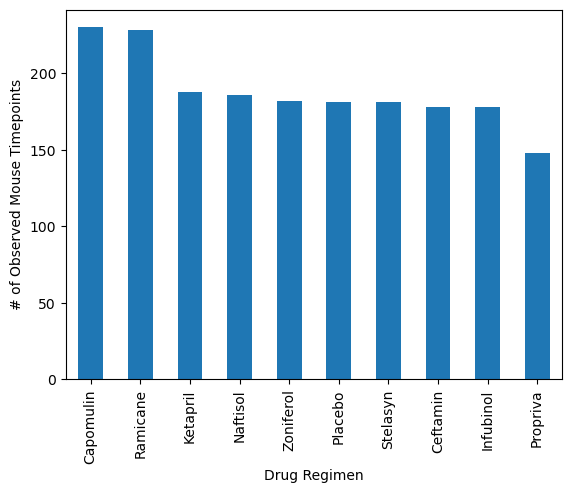

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
time_bar = clean_df.groupby(['Drug Regimen'])['Timepoint'].count()
time_bar.sort_values(ascending=False).plot.bar()
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.show

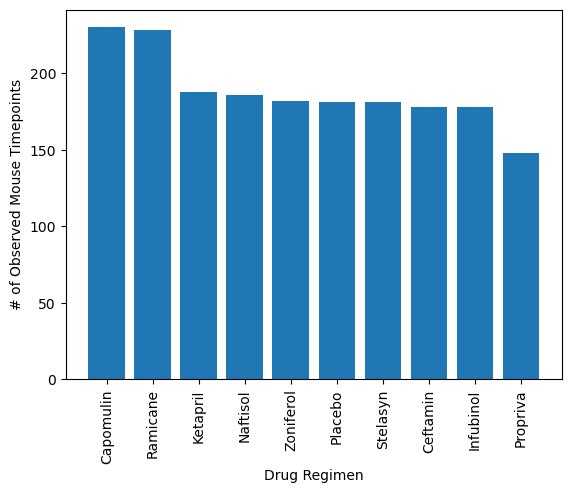

In [57]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pyplot_bar = time_bar.sort_values(ascending=False)
plt.bar(pyplot_bar.index, pyplot_bar.values)
plt.ylabel('# of Observed Mouse Timepoints', size=10)
plt.xlabel('Drug Regimen')
plt.xticks(rotation = 'vertical')
plt.show()


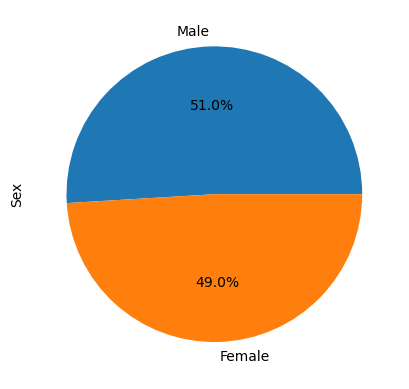

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_df['Sex'].value_counts()
gender.plot.pie(autopct="%1.1f%%")
plt.show()

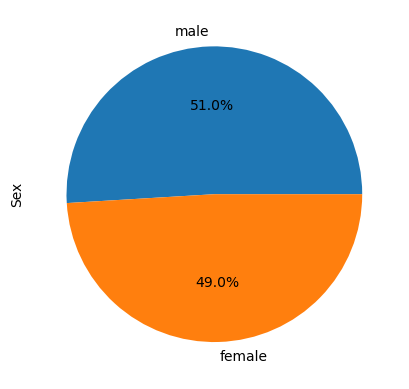

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender, labels= ('male', 'female'), autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [61]:
cap_df = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin",:]
ram_df = merged_df.loc[merged_df["Drug Regimen"] == "Ramicane", :]
inf_df = merged_df.loc[merged_df["Drug Regimen"] == "Infubinol", :]
ceft_df = merged_df.loc[merged_df["Drug Regimen"] == "Ceftamin", :]
ceft_df.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
484     a275     Ceftamin  Female          20          28          0   
485     a275     Ceftamin  Female          20          28          5   
486     a275     Ceftamin  Female          20          28         10   
487     a275     Ceftamin  Female          20          28         15   
488     a275     Ceftamin  Female          20          28         20   

     Tumor Volume (mm3)  Metastatic Sites  
484           45.000000                 0  
485           46.795257                 0  
486           47.371343                 0  
487           49.734404                 0  
488           50.513437                 1

In [62]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_time = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
# created a panda series by groupby of mouse id and the looking at the max timepoints of each mouse id turned it into a dataframe for merging
final_df= pd.DataFrame(final_time)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# merging "on" Mouse ID and Timepoint, "how" on RIGHT so that it only records the MAX timepoints
final_time_df = pd.merge(clean_df, final_df, on=('Mouse ID', 'Timepoint'), how="right")
final_time_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       a203         45                68.0                 2    Infubinol   
1       a251         45                65.5                 1    Infubinol   
2       a262         45                70.7                 4      Placebo   
3       a275         45                63.0                 3     Ceftamin   
4       a366         30                63.4                 1     Stelasyn   
..       ...        ...                 ...               ...          ...   
243     z435         10                48.7                 0     Propriva   
244     z578         45                30.6                 0     Ramicane   
245     z581         45                62.8                 3    Infubinol   
246     z795         45                65.7                 3     Naftisol   
247     z969         45                73.9                 4     Naftisol   

        Sex  Age_months  Weight (g)  
0    Female          20          23  
1    Female          21          25  
2    Female          17          29  
3    Female          20          28  
4    Female          16          29  
..      ...         ...         ...  
243  Female          12          26  
244    Male          11          16  
245  Female          24          25  
246  Female          13          29  
247    Male           9          30  

[248 rows x 8 columns]

In [63]:
# Put treatments into a list for for loop (and later for plot labels)
drug_reg = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
total_vol = [] 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# Determine outliers using upper and lower bounds
for drug in drug_reg:
    tumor_vol = final_time_df.loc[final_time_df["Drug Regimen"] == drug , "Tumor Volume (mm3)"]
    total_vol.append(tumor_vol)
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerquart = quartiles[.25]
    upperquart = quartiles[.75]
    iqr = upperquart - lowerquart
    lowerbound = lowerquart - (1.5*iqr)
    upperbound = upperquart + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lowerbound) | (tumor_vol > upperbound)]
    print(f"For {drug}, the potential outliers: {outliers}")

For Capomulin, the potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the potential outliers: 31    36.3
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


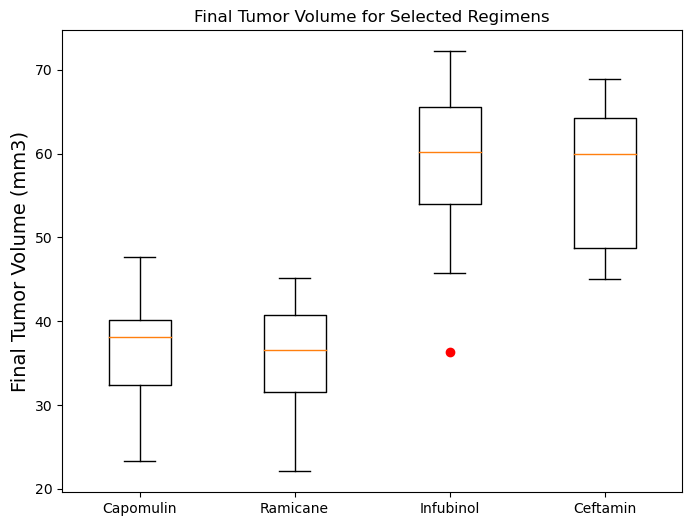

In [64]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
plt.title('Final Tumor Volume for Selected Regimens')
ax1.boxplot(total_vol, labels=drug_reg, widths=0.4, sym='r')
plt.show()

## Line and Scatter Plots

In [65]:
capo_df = clean_df.loc[clean_df["Drug Regimen"] == 'Capomulin',:]
capo_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
10       s185          0                45.0                 0    Capomulin   
11       s185          5                43.9                 0    Capomulin   
12       s185         10                37.6                 0    Capomulin   
13       s185         15                38.2                 0    Capomulin   
14       s185         20                36.9                 0    Capomulin   
...       ...        ...                 ...               ...          ...   
440      i557         45                47.7                 1    Capomulin   
1452     r157          0                45.0                 0    Capomulin   
1453     r157          5                45.6                 0    Capomulin   
1454     r157         10                46.1                 0    Capomulin   
1455     r157         15                46.5                 0    Capomulin   

         Sex  Age_months  Weight (g)  
10    Female           3          17  
11    Female           3          17  
12    Female           3          17  
13    Female           3          17  
14    Female           3          17  
...      ...         ...         ...  
440   Female           1          24  
1452    Male          22          25  
1453    Male          22          25  
1454    Male          22          25  
1455    Male          22          25  

[230 rows x 8 columns]

In [66]:
capo_mouse = capo_df.loc[capo_df["Mouse ID"] == "l509",:]
capo_mouse


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
371     l509          0                45.0                 0    Capomulin   
372     l509          5                45.9                 0    Capomulin   
373     l509         10                46.8                 0    Capomulin   
374     l509         15                47.5                 1    Capomulin   
375     l509         20                48.1                 2    Capomulin   
376     l509         25                44.0                 2    Capomulin   
377     l509         30                44.7                 2    Capomulin   
378     l509         35                40.2                 2    Capomulin   
379     l509         40                40.8                 2    Capomulin   
380     l509         45                41.5                 3    Capomulin   

      Sex  Age_months  Weight (g)  
371  Male          17          21  
372  Male          17          21  
373  Male          17          21  
374  Male          17          21  
375  Male          17          21  
376  Male          17          21  
377  Male          17          21  
378  Male          17          21  
379  Male          17          21  
380  Male          17          21

In [67]:
capo_df = clean_df.loc[clean_df["Drug Regimen"] == 'Capomulin',:]
capo_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
10       s185          0                45.0                 0    Capomulin   
11       s185          5                43.9                 0    Capomulin   
12       s185         10                37.6                 0    Capomulin   
13       s185         15                38.2                 0    Capomulin   
14       s185         20                36.9                 0    Capomulin   
...       ...        ...                 ...               ...          ...   
440      i557         45                47.7                 1    Capomulin   
1452     r157          0                45.0                 0    Capomulin   
1453     r157          5                45.6                 0    Capomulin   
1454     r157         10                46.1                 0    Capomulin   
1455     r157         15                46.5                 0    Capomulin   

         Sex  Age_months  Weight (g)  
10    Female           3          17  
11    Female           3          17  
12    Female           3          17  
13    Female           3          17  
14    Female           3          17  
...      ...         ...         ...  
440   Female           1          24  
1452    Male          22          25  
1453    Male          22          25  
1454    Male          22          25  
1455    Male          22          25  

[230 rows x 8 columns]

In [68]:
capo_mouse = capo_df.loc[capo_df["Mouse ID"] == "s185",:]
capo_mouse

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
10     s185          0                45.0                 0    Capomulin   
11     s185          5                43.9                 0    Capomulin   
12     s185         10                37.6                 0    Capomulin   
13     s185         15                38.2                 0    Capomulin   
14     s185         20                36.9                 0    Capomulin   
15     s185         25                33.9                 0    Capomulin   
16     s185         30                33.0                 1    Capomulin   
17     s185         35                28.3                 1    Capomulin   
18     s185         40                25.5                 1    Capomulin   
19     s185         45                23.3                 1    Capomulin   

       Sex  Age_months  Weight (g)  
10  Female           3          17  
11  Female           3          17  
12  Female           3          17  
13  Female           3          17  
14  Female           3          17  
15  Female           3          17  
16  Female           3          17  
17  Female           3          17  
18  Female           3          17  
19  Female           3          17

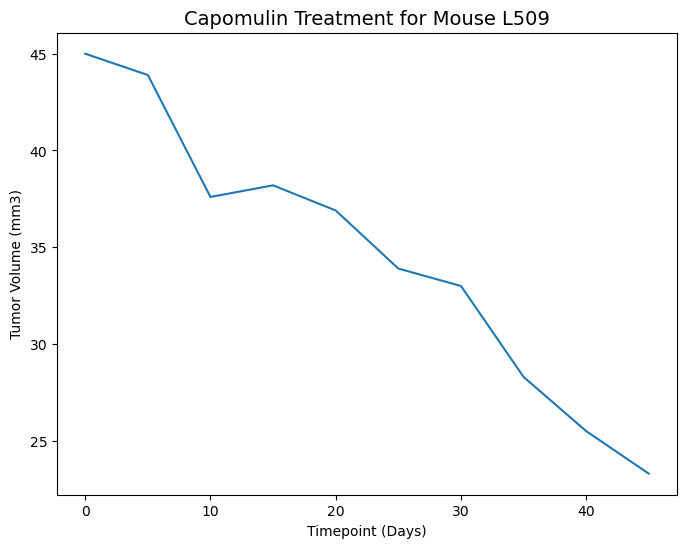

In [69]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
time_p = capo_mouse["Timepoint"]
tum_vol = capo_mouse["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots (figsize=(8,6))
plt.title("Capomulin Treatment for Mouse L509", fontsize=14)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(time_p, tum_vol)
plt.show()

/var/folders/31/992d9lzs0fx9cgbttrq800sm0000gn/T/ipykernel_67294/3861295293.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cap_avg_tum = capo_df.groupby(["Mouse ID"]).mean()


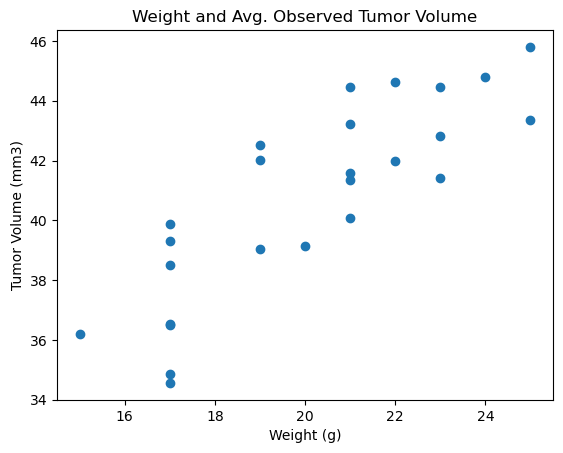

In [70]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_avg_tum = capo_df.groupby(["Mouse ID"]).mean()
plt.scatter(cap_avg_tum['Weight (g)'], cap_avg_tum['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Weight and Avg. Observed Tumor Volume')
plt.show()

## Correlation and Regression

In [71]:
correlation = round(st.pearsonr(cap_avg_tum['Weight (g)'],cap_avg_tum['Tumor Volume (mm3)'])[0],2)
correlation

0.84

In [72]:
linregress = st.linregress(cap_avg_tum['Weight (g)'],cap_avg_tum['Tumor Volume (mm3)'])
linregress

LinregressResult(slope=0.9545270545158667, intercept=21.55301566314076, rvalue=0.8417411434039539, pvalue=1.3401214639797083e-07, stderr=0.12765683583829338, intercept_stderr=2.5932882156431396)

In [73]:
slope = 0.9545270545158667
intercept = 21.55301566314076 
linear = slope*(cap_avg_tum["Weight (g)"]) + intercept

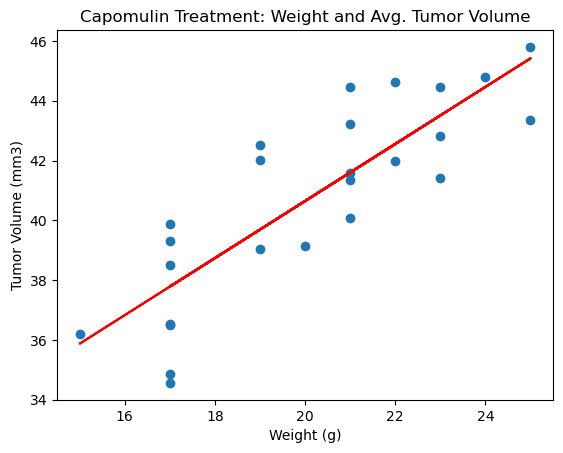

In [74]:
plt.scatter(cap_avg_tum["Weight (g)"], cap_avg_tum["Tumor Volume (mm3)"])
plt.plot(cap_avg_tum['Weight (g)'], linear, color="r".format(slope,intercept))
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Capomulin Treatment: Weight and Avg. Tumor Volume')
plt.show()

In [75]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
